# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Smart Crop Yield Dataset](https://www.kaggle.com/datasets/miadul/smart-crop-yield-predication-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.


# Importing

## Import Library

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

/kaggle/input/smart-crop-yield-predication-dataset/crop_yield_dataset.csv


## Import CSV And convert to DataFrame

In [55]:
df = pd.read_csv('crop_yield_dataset.csv')

## Preprocessing

## Frist five row

In [56]:
df.head()

Crop    Region Soil_Type  Soil_pH  Rainfall_mm  Temperature_C  \
0   Maize  Region_C     Sandy     7.01       1485.4           19.7   
1  Barley  Region_D      Loam     5.79        399.4           29.1   
2    Rice  Region_C      Clay     7.24        980.9           30.5   
3   Maize  Region_D      Loam     6.79       1054.3           26.4   
4   Maize  Region_D     Sandy     5.96        744.6           20.4   

   Humidity_pct  Fertilizer_Used_kg Irrigation  Pesticides_Used_kg  \
0          40.3               105.1       Drip                10.2   
1          55.4               221.8  Sprinkler                35.5   
2          74.4                61.2  Sprinkler                40.0   
3          62.0               257.8       Drip                42.7   
4          70.9               195.8       Drip                25.5   

   Planting_Density Previous_Crop  Yield_ton_per_ha  
0              23.2          Rice            101.48  
1               7.4        Barley            127.39  
2               5.1         Wheat             68.99  
3              23.7           NaN            169.06  
4              15.6         Maize            118.71

## last Five row

In [57]:
df.tail()

Crop    Region Soil_Type  Soil_pH  Rainfall_mm  Temperature_C  \
9995  Barley  Region_A      Clay     5.84        890.4           28.5   
9996   Maize  Region_A     Sandy     6.91        614.2           30.0   
9997   Wheat  Region_A      Clay     6.98        842.0           22.6   
9998   Wheat  Region_D     Sandy     7.27        924.2           26.8   
9999    Rice  Region_C     Sandy     5.95        247.0           31.1   

      Humidity_pct  Fertilizer_Used_kg Irrigation  Pesticides_Used_kg  \
9995          68.6                82.5      Flood                 4.0   
9996          84.2                85.2        NaN                21.7   
9997          75.1               249.2  Sprinkler                 8.8   
9998          50.8               146.1  Sprinkler                 3.3   
9999          66.2               223.4      Flood                18.7   

      Planting_Density Previous_Crop  Yield_ton_per_ha  
9995              24.1         Wheat             79.83  
9996               8.3         Maize             68.24  
9997              18.1          Rice            159.29  
9998              18.1         Maize             99.08  
9999              12.1          Rice            121.30

## Shape of our dataset

In [58]:
df.shape

(10000, 13)

## List out all columns

In [59]:
df.columns

Index(['Crop', 'Region', 'Soil_Type', 'Soil_pH', 'Rainfall_mm',
       'Temperature_C', 'Humidity_pct', 'Fertilizer_Used_kg', 'Irrigation',
       'Pesticides_Used_kg', 'Planting_Density', 'Previous_Crop',
       'Yield_ton_per_ha'],
      dtype='object')

## Datatype of each columns

In [60]:
df.dtypes

Crop                   object
Region                 object
Soil_Type              object
Soil_pH               float64
Rainfall_mm           float64
Temperature_C         float64
Humidity_pct          float64
Fertilizer_Used_kg    float64
Irrigation             object
Pesticides_Used_kg    float64
Planting_Density      float64
Previous_Crop          object
Yield_ton_per_ha      float64
dtype: object

## Information of all Columns

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                10000 non-null  object 
 1   Region              10000 non-null  object 
 2   Soil_Type           10000 non-null  object 
 3   Soil_pH             10000 non-null  float64
 4   Rainfall_mm         10000 non-null  float64
 5   Temperature_C       10000 non-null  float64
 6   Humidity_pct        10000 non-null  float64
 7   Fertilizer_Used_kg  10000 non-null  float64
 8   Irrigation          7462 non-null   object 
 9   Pesticides_Used_kg  10000 non-null  float64
 10  Planting_Density    10000 non-null  float64
 11  Previous_Crop       7969 non-null   object 
 12  Yield_ton_per_ha    10000 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1015.8+ KB


## Check Null Value

In [62]:
df.isnull().sum()

Crop                     0
Region                   0
Soil_Type                0
Soil_pH                  0
Rainfall_mm              0
Temperature_C            0
Humidity_pct             0
Fertilizer_Used_kg       0
Irrigation            2538
Pesticides_Used_kg       0
Planting_Density         0
Previous_Crop         2031
Yield_ton_per_ha         0
dtype: int64

## Replace Data at null

In [63]:
df["Irrigation"] = df["Irrigation"].fillna("Unknown")
df["Previous_Crop"] = df["Previous_Crop"].fillna("None")

## Check Dupicate Value

In [64]:
df.duplicated().sum()

np.int64(0)

## Summary

In [65]:
df.describe()

Soil_pH  Rainfall_mm  Temperature_C  Humidity_pct  \
count  10000.000000  10000.00000   10000.000000  10000.000000   
mean       6.516693    843.66467      24.975750     60.052550   
std        0.574761    373.67076       5.790631     17.317097   
min        5.500000    200.00000      15.000000     30.000000   
25%        6.020000    518.00000      20.000000     45.100000   
50%        6.520000    845.30000      24.900000     60.200000   
75%        7.010000   1161.85000      30.100000     75.100000   
max        7.500000   1499.70000      35.000000     90.000000   

       Fertilizer_Used_kg  Pesticides_Used_kg  Planting_Density  \
count        10000.000000        10000.000000      10000.000000   
mean           175.083290           25.055500         14.997930   
std             71.964157           14.353483          5.833087   
min             50.000000            0.000000          5.000000   
25%            113.300000           12.600000          9.900000   
50%            175.000000           25.300000         15.000000   
75%            237.900000           37.500000         20.100000   
max            300.000000           50.000000         25.000000   

       Yield_ton_per_ha  
count      10000.000000  
mean         117.891105  
std           37.972664  
min           28.450000  
25%           87.135000  
50%          117.705000  
75%          149.147500  
max          207.210000

In [66]:
df.head()

Crop    Region Soil_Type  Soil_pH  Rainfall_mm  Temperature_C  \
0   Maize  Region_C     Sandy     7.01       1485.4           19.7   
1  Barley  Region_D      Loam     5.79        399.4           29.1   
2    Rice  Region_C      Clay     7.24        980.9           30.5   
3   Maize  Region_D      Loam     6.79       1054.3           26.4   
4   Maize  Region_D     Sandy     5.96        744.6           20.4   

   Humidity_pct  Fertilizer_Used_kg Irrigation  Pesticides_Used_kg  \
0          40.3               105.1       Drip                10.2   
1          55.4               221.8  Sprinkler                35.5   
2          74.4                61.2  Sprinkler                40.0   
3          62.0               257.8       Drip                42.7   
4          70.9               195.8       Drip                25.5   

   Planting_Density Previous_Crop  Yield_ton_per_ha  
0              23.2          Rice            101.48  
1               7.4        Barley            127.39  
2               5.1         Wheat             68.99  
3              23.7          None            169.06  
4              15.6         Maize            118.71

# EDA

In [67]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

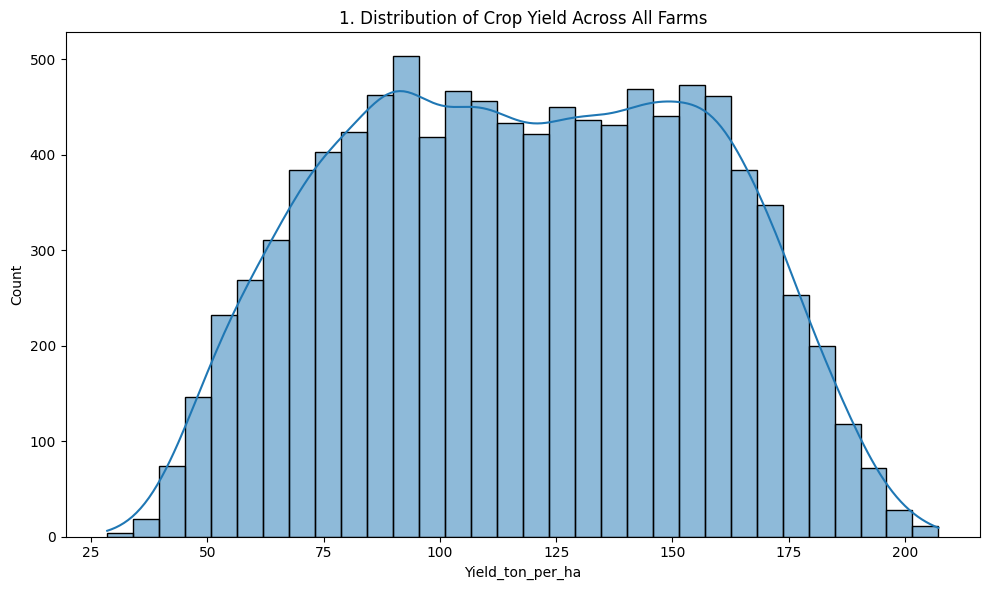

In [68]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Yield_ton_per_ha'], kde=True)
plt.title(f'{plot_no}. Distribution of Crop Yield Across All Farms')
show_fig()
plot_no += 1


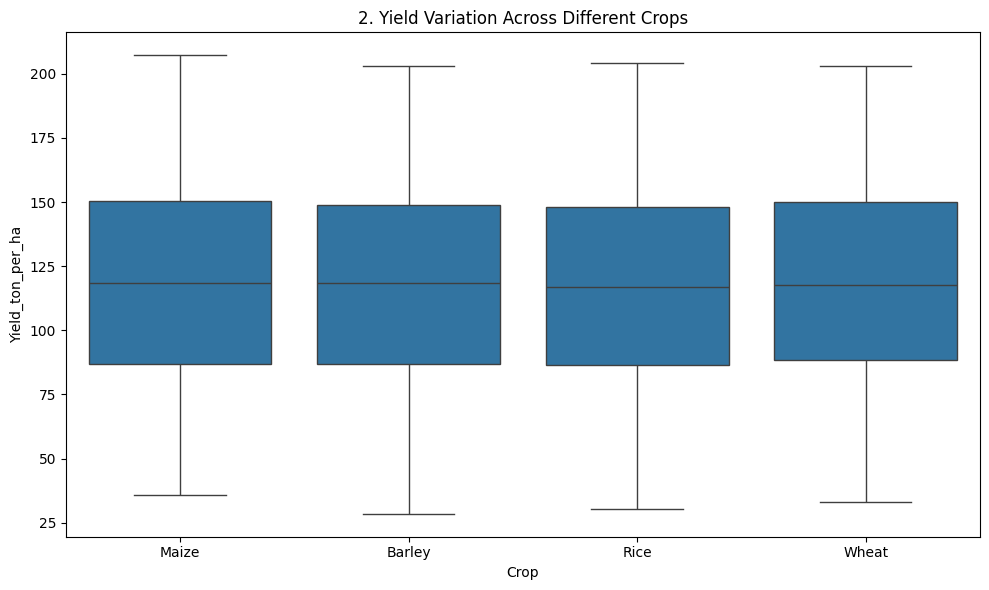

In [69]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Crop', y='Yield_ton_per_ha', data=df)
plt.title(f'{plot_no}. Yield Variation Across Different Crops')
show_fig()
plot_no += 1


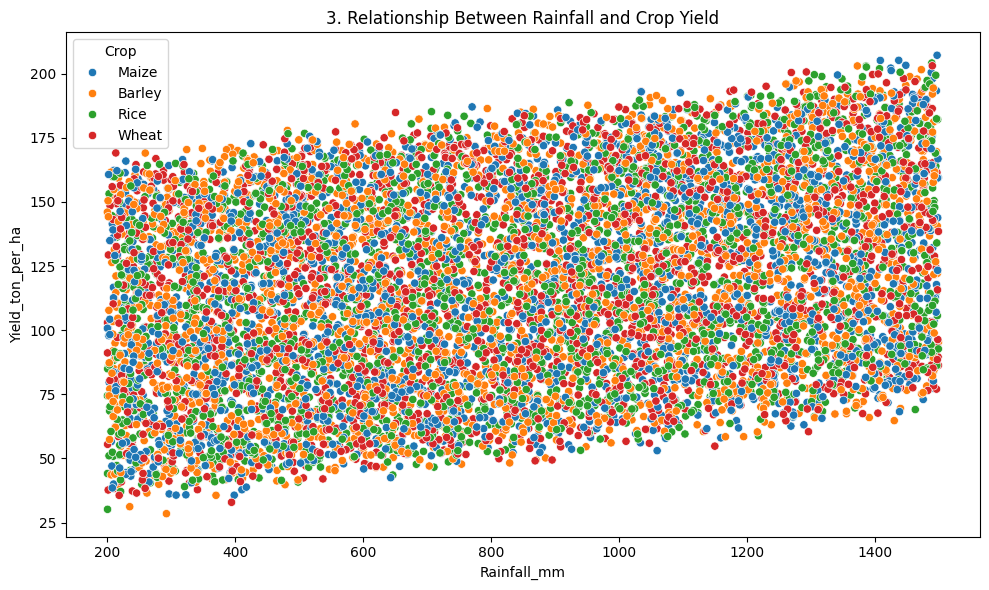

In [70]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Rainfall_mm', y='Yield_ton_per_ha', hue='Crop', data=df)
plt.title(f'{plot_no}. Relationship Between Rainfall and Crop Yield')
show_fig()
plot_no += 1


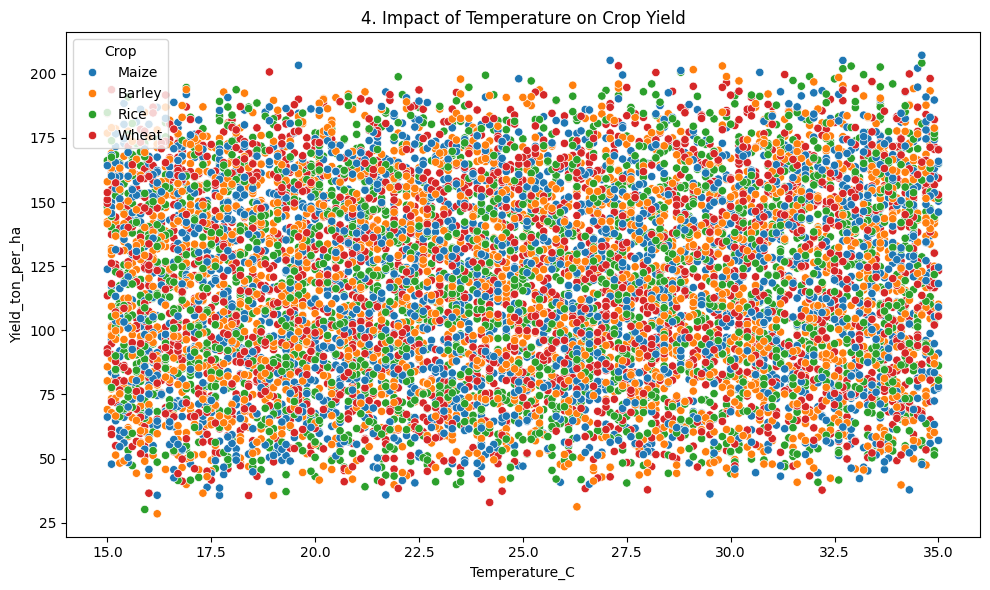

In [71]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature_C', y='Yield_ton_per_ha', hue='Crop', data=df)
plt.title(f'{plot_no}. Impact of Temperature on Crop Yield')
show_fig()
plot_no += 1


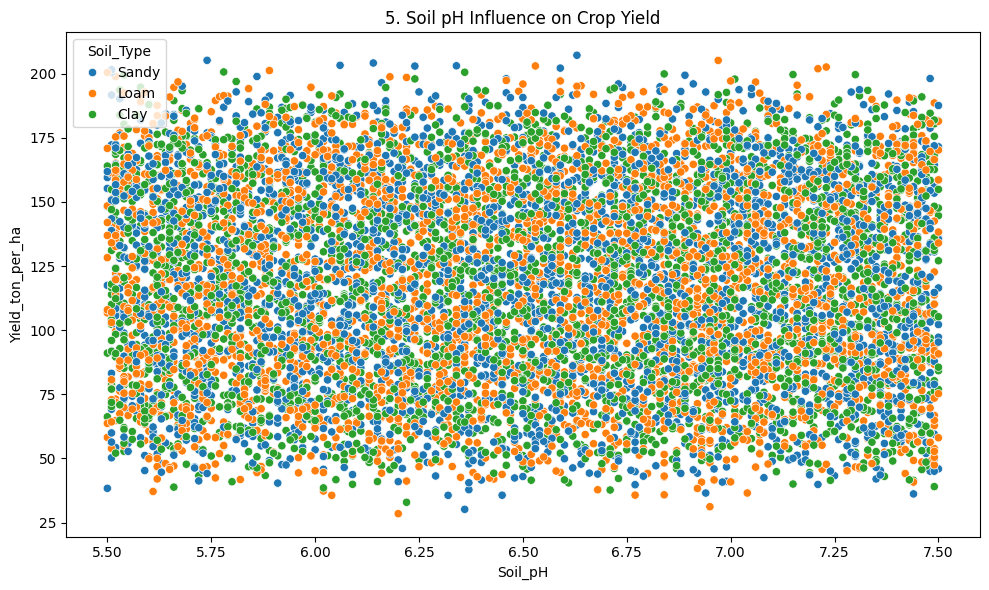

In [72]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Soil_pH', y='Yield_ton_per_ha', hue='Soil_Type', data=df)
plt.title(f'{plot_no}. Soil pH Influence on Crop Yield')
show_fig()
plot_no += 1


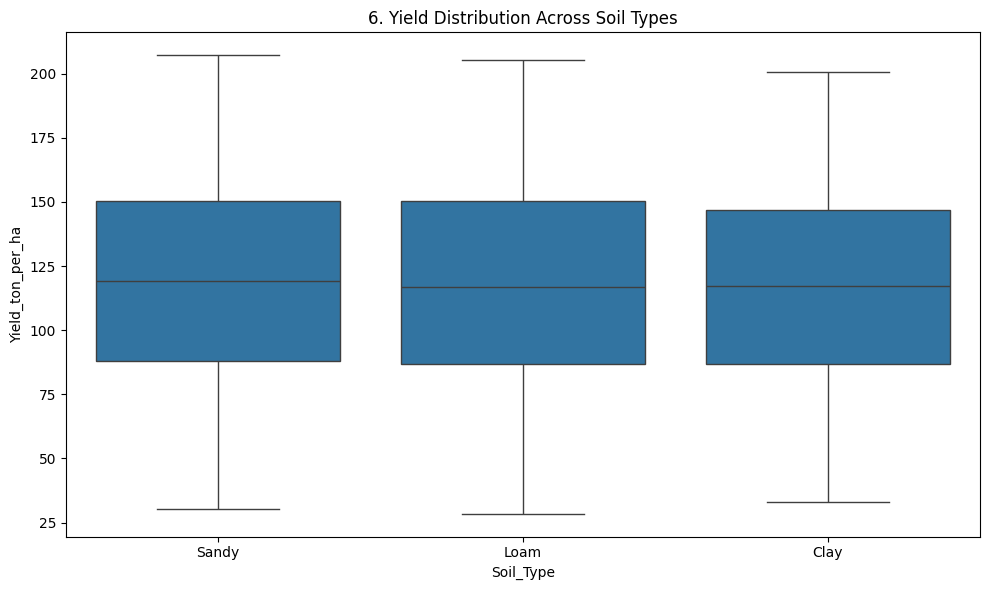

In [73]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Soil_Type', y='Yield_ton_per_ha', data=df)
plt.title(f'{plot_no}. Yield Distribution Across Soil Types')
show_fig()
plot_no += 1


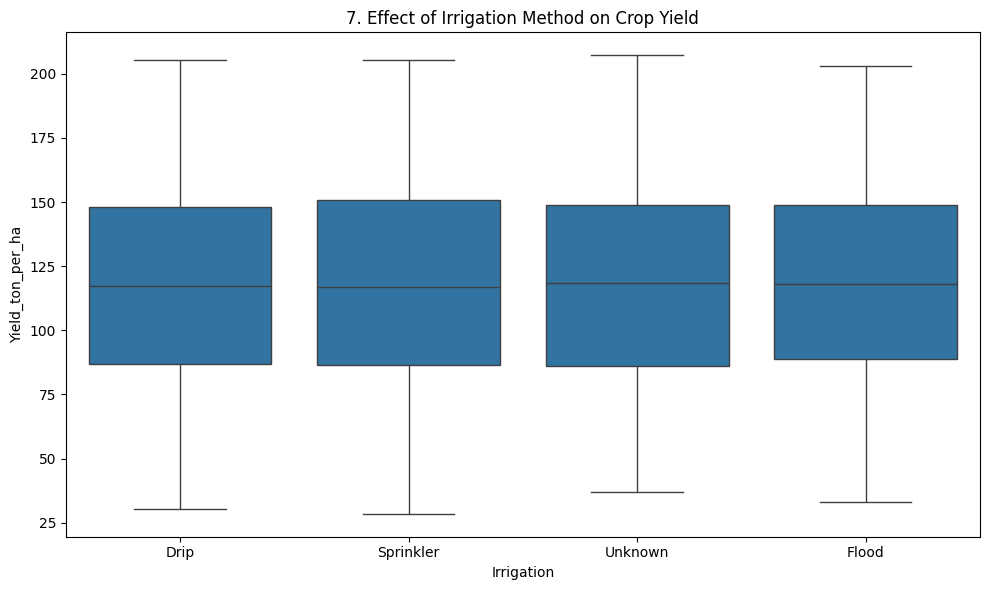

In [74]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Irrigation', y='Yield_ton_per_ha', data=df)
plt.title(f'{plot_no}. Effect of Irrigation Method on Crop Yield')
show_fig()
plot_no += 1


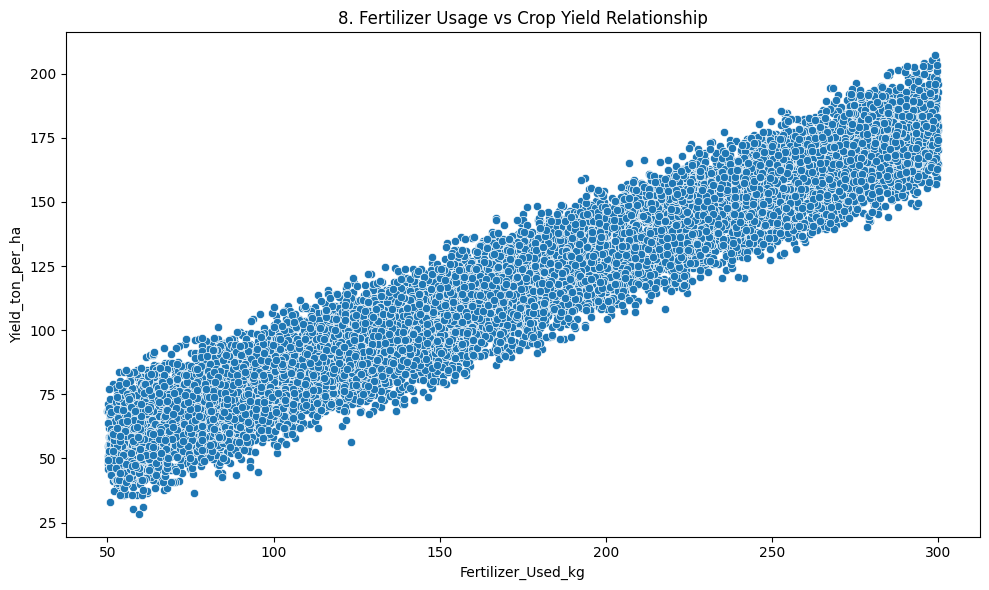

In [75]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Fertilizer_Used_kg', y='Yield_ton_per_ha', data=df)
plt.title(f'{plot_no}. Fertilizer Usage vs Crop Yield Relationship')
show_fig()
plot_no += 1


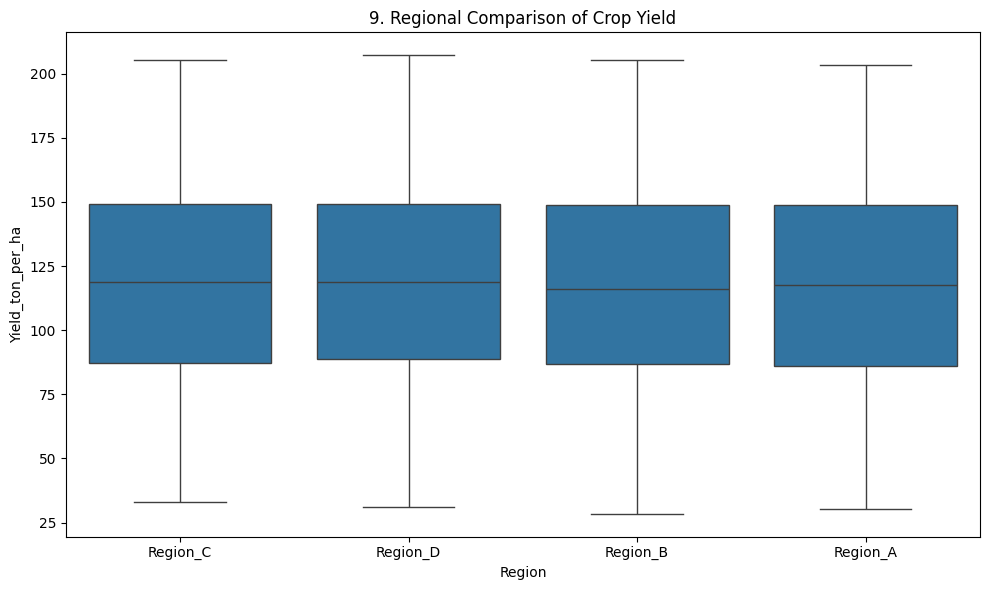

In [76]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Yield_ton_per_ha', data=df)
plt.title(f'{plot_no}. Regional Comparison of Crop Yield')
show_fig()
plot_no += 1


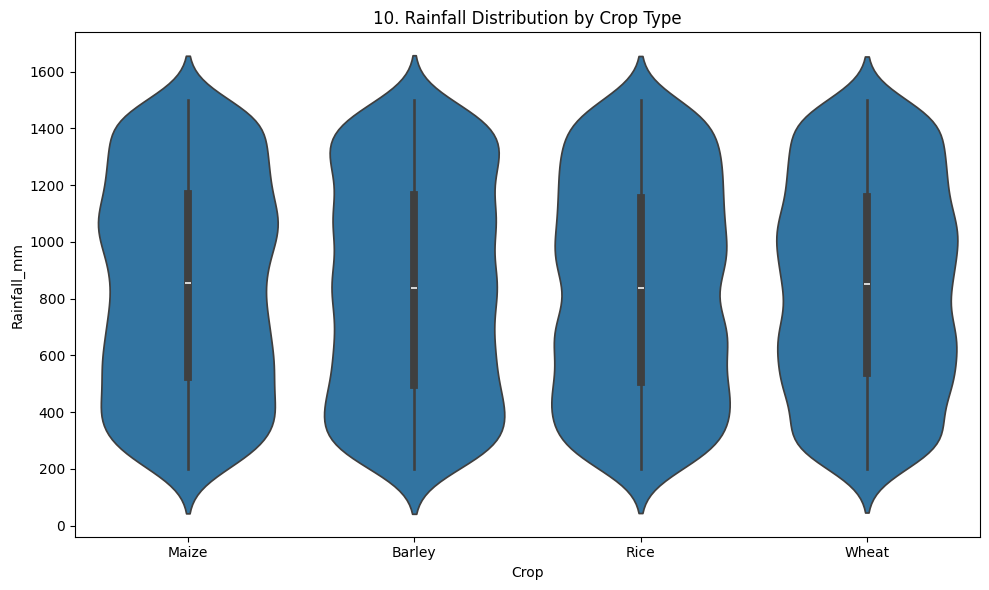

In [77]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='Crop', y='Rainfall_mm', data=df)
plt.title(f'{plot_no}. Rainfall Distribution by Crop Type')
show_fig()
plot_no += 1


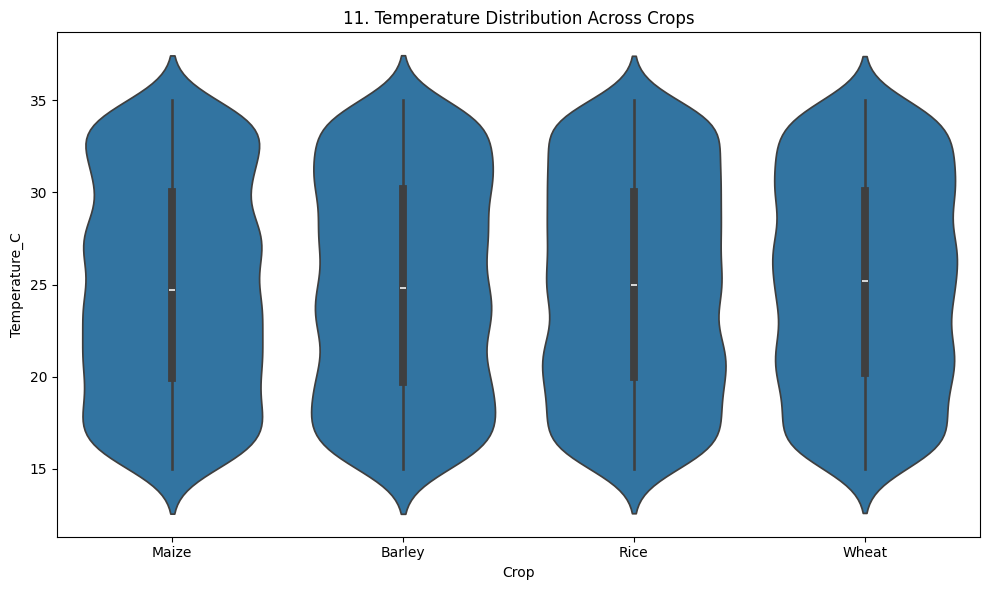

In [78]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='Crop', y='Temperature_C', data=df)
plt.title(f'{plot_no}. Temperature Distribution Across Crops')
show_fig()
plot_no += 1


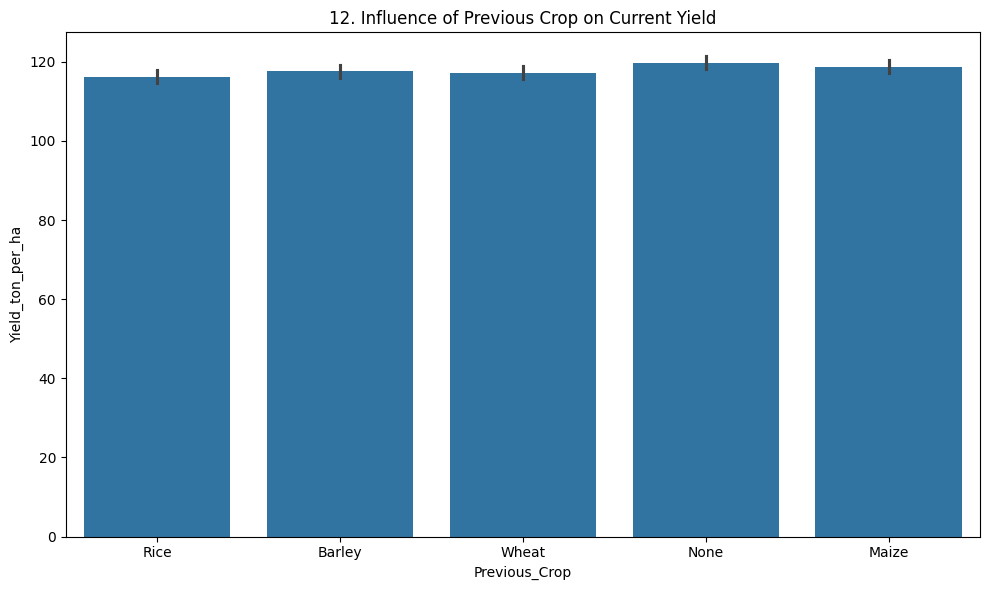

In [79]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Previous_Crop', y='Yield_ton_per_ha', data=df)
plt.title(f'{plot_no}. Influence of Previous Crop on Current Yield')
show_fig()
plot_no += 1


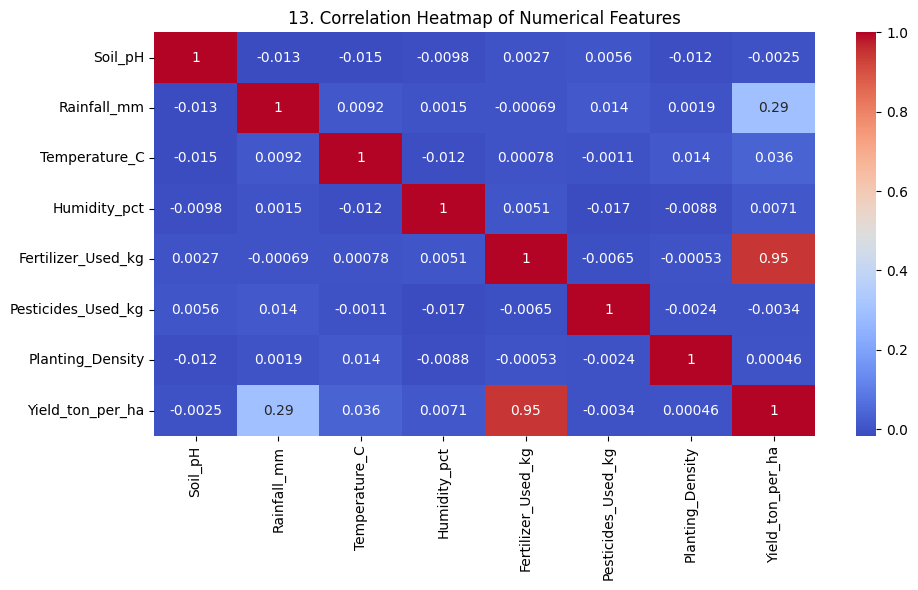

In [80]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Heatmap of Numerical Features')
show_fig()
plot_no += 1


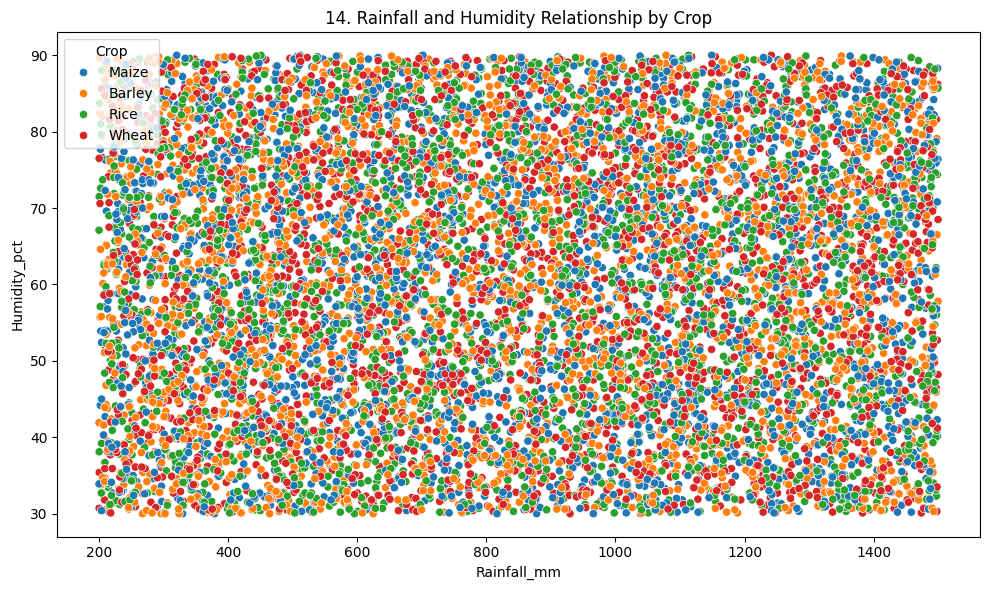

In [81]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Rainfall_mm', y='Humidity_pct', hue='Crop', data=df)
plt.title(f'{plot_no}. Rainfall and Humidity Relationship by Crop')
show_fig()
plot_no += 1


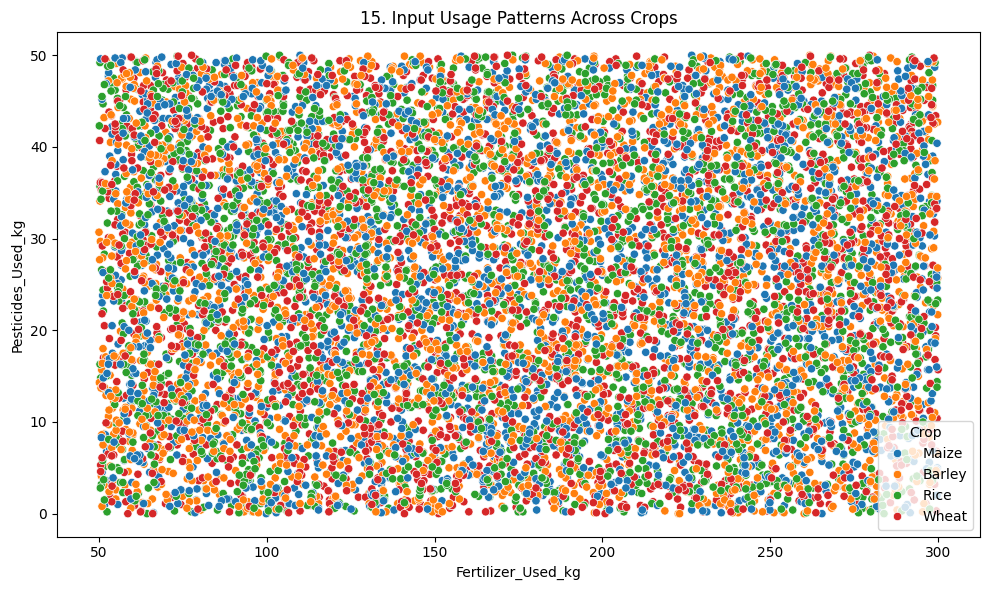

In [82]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Fertilizer_Used_kg', y='Pesticides_Used_kg', hue='Crop', data=df)
plt.title(f'{plot_no}. Input Usage Patterns Across Crops')
show_fig()
plot_no += 1


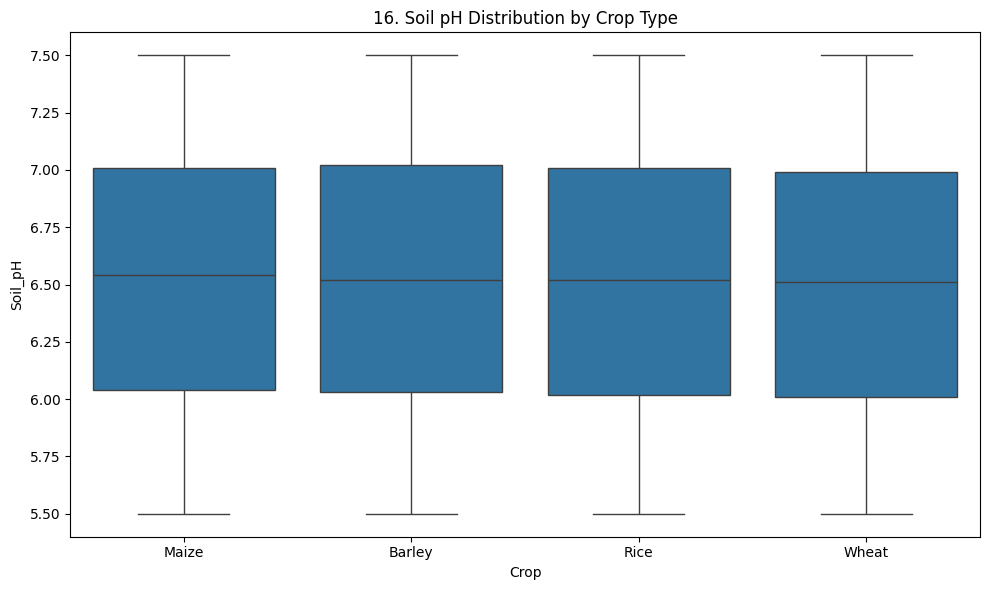

In [83]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Crop', y='Soil_pH', data=df)
plt.title(f'{plot_no}. Soil pH Distribution by Crop Type')
show_fig()
plot_no += 1


In [84]:
df.select_dtypes(include='number').corr()

Soil_pH  Rainfall_mm  Temperature_C  Humidity_pct  \
Soil_pH             1.000000    -0.013136      -0.015249     -0.009788   
Rainfall_mm        -0.013136     1.000000       0.009170      0.001472   
Temperature_C      -0.015249     0.009170       1.000000     -0.011534   
Humidity_pct       -0.009788     0.001472      -0.011534      1.000000   
Fertilizer_Used_kg  0.002719    -0.000686       0.000781      0.005125   
Pesticides_Used_kg  0.005638     0.013530      -0.001114     -0.016729   
Planting_Density   -0.011672     0.001924       0.013900     -0.008843   
Yield_ton_per_ha   -0.002520     0.294182       0.035878      0.007116   

                    Fertilizer_Used_kg  Pesticides_Used_kg  Planting_Density  \
Soil_pH                       0.002719            0.005638         -0.011672   
Rainfall_mm                  -0.000686            0.013530          0.001924   
Temperature_C                 0.000781           -0.001114          0.013900   
Humidity_pct                  0.005125           -0.016729         -0.008843   
Fertilizer_Used_kg            1.000000           -0.006475         -0.000534   
Pesticides_Used_kg           -0.006475            1.000000         -0.002407   
Planting_Density             -0.000534           -0.002407          1.000000   
Yield_ton_per_ha              0.945808           -0.003400          0.000458   

                    Yield_ton_per_ha  
Soil_pH                    -0.002520  
Rainfall_mm                 0.294182  
Temperature_C               0.035878  
Humidity_pct                0.007116  
Fertilizer_Used_kg          0.945808  
Pesticides_Used_kg         -0.003400  
Planting_Density            0.000458  
Yield_ton_per_ha            1.000000

# Model Training

## Separate features and target variable

In [85]:
X = df.select_dtypes(include='number').drop(columns=['Yield_ton_per_ha'])
y = df['Yield_ton_per_ha']

## Split data into training and testing sets

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Apply feature scaling to normalize numeric inputs

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Linear Regression model

In [88]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Generate predictions on test data

In [89]:
y_pred = model.predict(X_test_scaled)

## Evaluate model performance

In [90]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [91]:
print(f"Model R2 Accuracy Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

Model R2 Accuracy Score: 0.9821
RMSE: 5.08


## Visualize actual vs predicted values

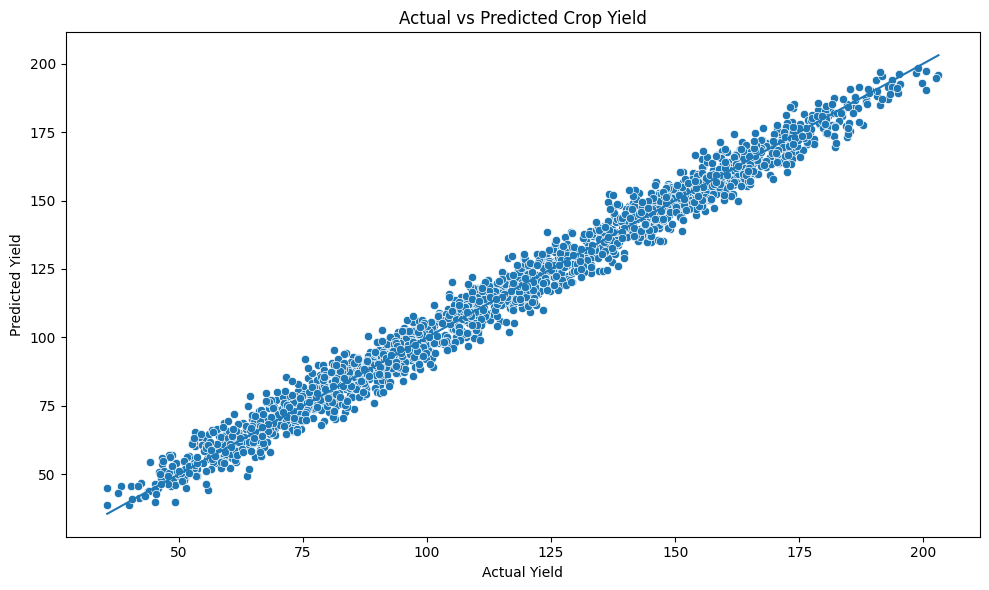

In [92]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.tight_layout()
plt.show()